<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Frequent_Value_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Frequent Value Imputation :-

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
df=pd.read_csv("House_Train.csv" ,usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [129]:
df.shape

(1460, 3)

In [130]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [131]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

#Imputing GarageQual column:--

In [132]:
df["GarageQual"].value_counts().sum()

1379

Text(0, 0.5, 'Number of houses')

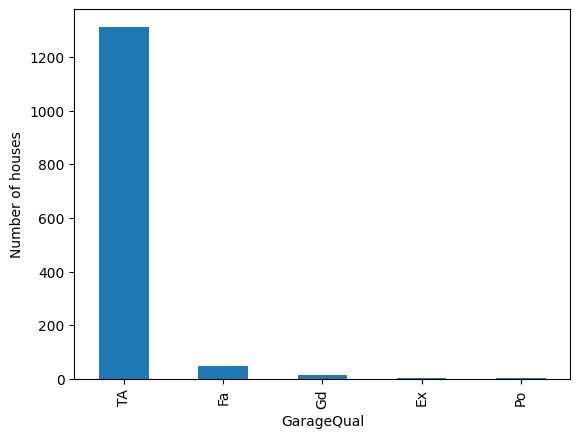

In [133]:
df['GarageQual'].value_counts().plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [134]:
df["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

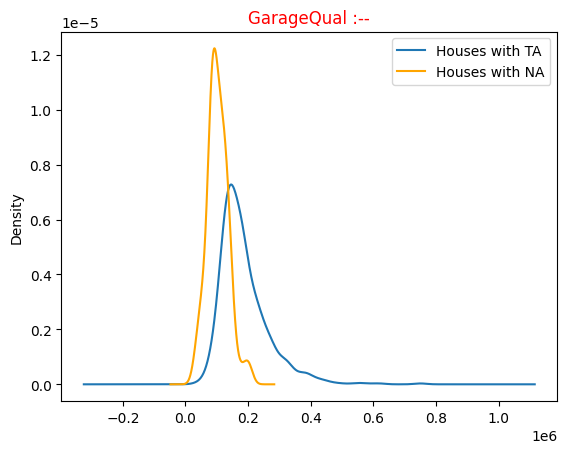

In [135]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df["GarageQual"]=='TA']["SalePrice"].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]["SalePrice"].plot(kind='kde',ax=ax,color='orange')

label,legend=ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(labels,loc='best')
plt.title("GarageQual :--",color="red")
plt.show()


In [136]:
temp=df[df["GarageQual"]=='TA']["SalePrice"]

In [137]:
df["GarageQual"].fillna("TA",inplace=True)

In [138]:
df.isnull().sum()

FireplaceQu    690
GarageQual       0
SalePrice        0
dtype: int64

<Axes: xlabel='GarageQual'>

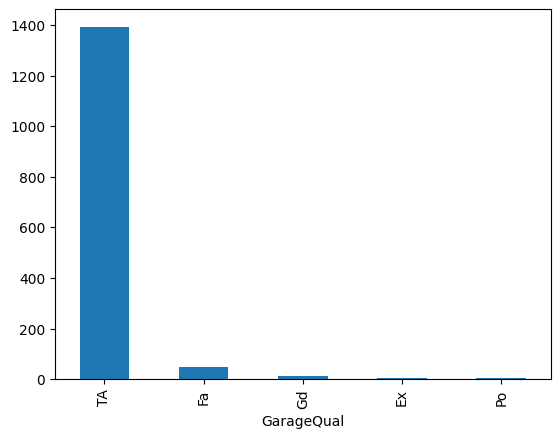

In [139]:
df['GarageQual'].value_counts().plot(kind='bar')

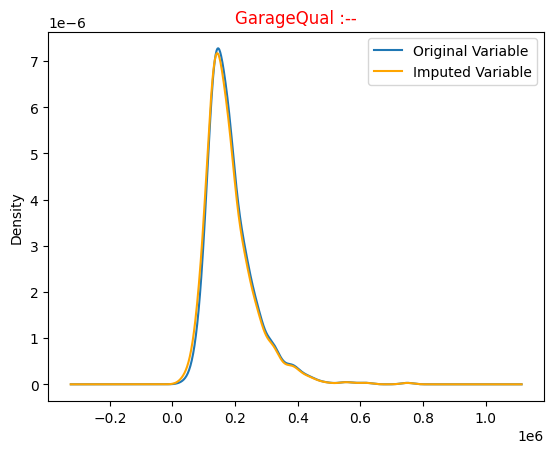

In [140]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)

# distribution of the variable after imputation
df[df['GarageQual']=="TA"]["SalePrice"].plot(kind='kde',ax=ax,color='orange')

label,legend=ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(labels,loc='best')
plt.title("GarageQual :--",color="red")
plt.show()

In [141]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [142]:
df['FireplaceQu'].isnull().sum()

690

<Axes: xlabel='FireplaceQu'>

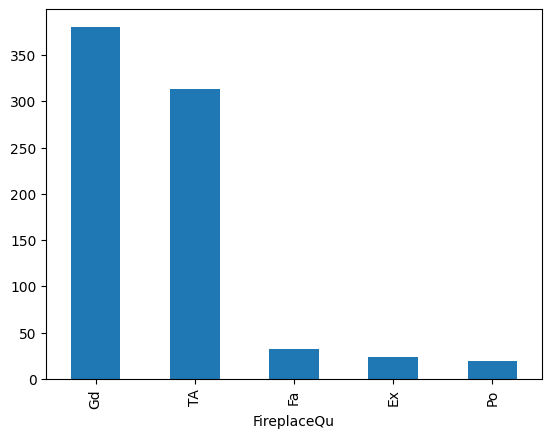

In [143]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [144]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

##Ploting kde for FireplaceQu :-

Text(0.5, 1.0, 'FireplaceQu')

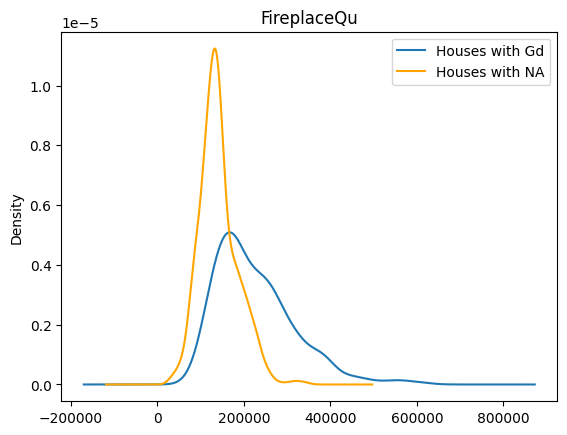

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='orange')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [146]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [147]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

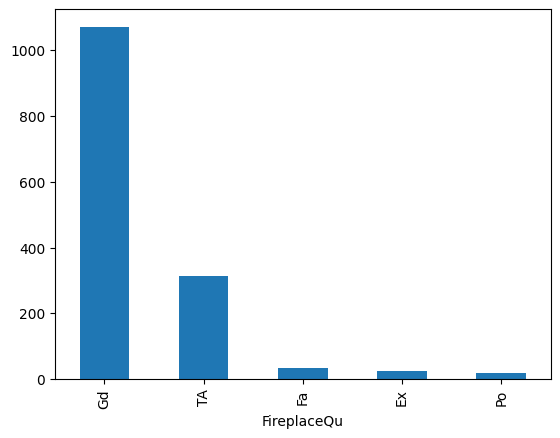

In [148]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [149]:
df.isnull().sum()

FireplaceQu    0
GarageQual     0
SalePrice      0
dtype: int64

Text(0.5, 1.0, 'FireplaceQu')

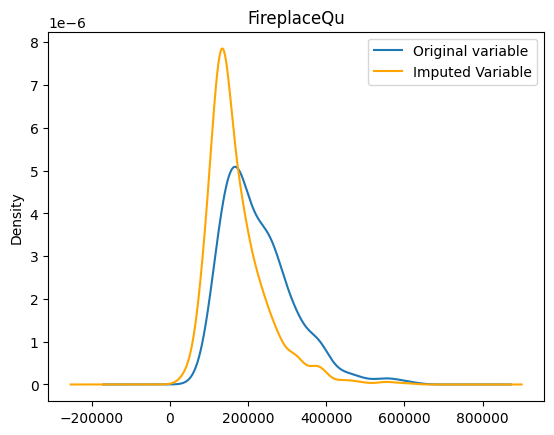

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df['FireplaceQu']=="Gd"]['SalePrice'].plot(kind='kde', ax=ax, color='orange')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed Variable']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

#using scikit-learn :--

In [151]:
df=pd.read_csv("House_Train.csv" ,usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [152]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [153]:
imputer=SimpleImputer(strategy='most_frequent')

In [154]:
X_train,X_test,y_train,y_test=train_test_split(df[['GarageQual','FireplaceQu']],df['SalePrice'],test_size=0.2,random_state=2)

In [155]:
X_train=imputer.fit_transform(X_train)
Y_train=imputer.transform(X_test)

In [156]:
imputer.statistics_

array(['TA', 'Gd'], dtype=object)

In [157]:
X_train

array([['TA', 'TA'],
       ['TA', 'Gd'],
       ['TA', 'Fa'],
       ...,
       ['TA', 'Fa'],
       ['TA', 'Gd'],
       ['TA', 'Gd']], dtype=object)